<a href="https://colab.research.google.com/github/jorge673/ADA/blob/main/Informe-Qsort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Descripcion del problema**
---
**Entrada**: Una lista de n-números: $a = [a_1, a_2,…,a_{n-1}, a_n]$

**Salida**: Una lista ordenada con los elementos ordenados $a' = [a_1, a_2,…,a_{n-1}, a_n]$ de manera que *$a_1'\leq a_2' \leq a_3'\leq... \leq a_n'$*

![image](https://imgur.com/v99pCtP.png)

Es uno de los problemas más antiguos de la programación y uno de los más comunes a la vez debido a que tiene un grado de complejidad a pesar de lo muy simple y sencillo que parezca, es por eso que hasta el día de hoy se investiga sobre este problema para hacerlo cada vez más sencillo y eficiente.



#**2. Quicksort**
---


##**2.1 Codigo**

In [300]:
import random
from termcolor import colored

def Particion(l, r, arr,cont,verbose=False):
  pivot, i = arr[r], l

  for j in range(l, r):
      if arr[j] <= pivot:
          arr[i], arr[j] = arr[j], arr[i]
          i += 1
          cont+=1
      if(verbose):
        print("   Ciclo ("+str(j+1)+") = [",end="")
        if(i>0 and l!=i):
          print(colored(f"{str(a[l:i])[1:-1]}","red"),end=colored(f", ","red"))
        if(j>=i):
          print(colored(f"{str(a[i:j+1])[1:-1]}","blue"),end=colored(f", ","blue"))
        if(j!=r-1):
          print(str(a[j+1:r])[1:-1],end=", ")
        print(colored(f"{str(a[r])}","green")+"]")

  arr[i], arr[r] = arr[r], arr[i]

  if(verbose and i!=r):
    print("Intercambio = [",end="")
    if(i>0 and l!=i):
      print(colored(f"{str(a[l:i])[1:-1]}","red"),end=colored(f", ","red"))

    print(colored(f"{str(a[i])}","green"),end=colored(f", ","green"))

    if(j>=i):
      print(colored(f"{str(a[i+1:r+1])[1:-1]}","blue")+"]")
    

  return i,cont

def RandParticion(l, r, arr,cont,verbose=False):
  if(l<r and len(arr)!=1 ):
    randpivot = random.randrange(l, r)
  arr[l], arr[randpivot] = arr[randpivot], arr[l]

  return Particion(l, r, arr,cont,verbose)

def BajaParticion(l, r, arr,cont,verbose=False):

  arr[l], arr[r] = arr[r], arr[l]

  return Particion(l, r, arr,cont,verbose)

 
def Qsort(low, high, arr ,func=Particion ,verbose=False ,cont=0 ):
  
  if(verbose and low < high):print("Qsort:",arr[low:high+1])

  if len(arr) == 1: 
      if(verbose):
        print("El arrelgo es de tamaño 1") 
      return arr

  if low < high:

      pi ,cont = func(low, high, arr, cont ,verbose)

      arr,cont=Qsort(low, pi-1, arr,func,verbose,cont)  
      arr,cont=Qsort(pi+1, high, arr,func,verbose,cont)  

  return arr,cont

a=[9,2,6,3,7,4,5,1,8]

print("Arreglo a:",a)
a,cont = Qsort(0,len(a)-1,a,Particion)
print("Arreglo ordenado :",a)

Arreglo a: [9, 2, 6, 3, 7, 4, 5, 1, 8]
Arreglo ordenado : [1, 2, 3, 4, 5, 6, 7, 8, 9]


---

##2.2 **Descpripcion del algoritmo**
----
Al algoritmo se le entrega un arreglo de $n$-elementos y los indices de ambos estremos (si el arreglo es de 4 elementos se le entrega {0,4} respectivamente) para que este devuelva o retorne el mismo arrelgo con sus elementos ordenados de menor a mayor para esto quicksort usa el paradigma de divide y conquista, 

1.   usando la funcion `particion` se trata de sacar el pivote el cual partira el algoritmo en 2 mitades tal que los elementos que estan por debajo del pivote son menores que este y la mitad por arriba son mayores que el pivote
2.   se retorna qsort de ambas mitades `qsort(a,inferior,pivote-1)` y `qsort(a,pivote+1,superior)`
3. retorna arreglo ordenado


##**2.3 Funcion Particion()**
---
  esta funcion se encarga de sacar el pivote del arreglo desde `low` hasta `high` para esto asigna el ultimo elemento e crea 2 parametros 
  >`i` es el indice que se usa para asignar los elementos menores al verbose  
  >`j` es el indice que se usa para asignar los elementos mayores al verbose

de donde sacamos el pivote es elecion del usario por lo general se saca el ultimo elemento del arreglo

1. Revisar si arr[j] es **mayor o menor que x**. 
2. Si `arr[j] > x`, está todo bien
3. Si `arr[j] <= x`, intercambiamos `arr[j]` con `arr[i+1]` y i aumenta una unidad.
4. En cualquier caso j se aumenta 1 unidad


##**2.4 Ejemplo Particion()**
---
>![image](https://i.stack.imgur.com/F0pge.png)

como se explica en la imagen el arreglo que va de `p` hasta `j` va comparando a `j` con arr[r] al final de todo se intercambia arr[r] con arr[i]





#**3.Tiempo de ejecucion**
>Teorema:
>_"QuickSort tiene una complejidad temporal de $O(nlLog(n))$ en el mejor caso y $O(n^2)$ en el peor caso"_

##**3.1 Prueba del teorema**
---
para esto analisaremos los casos que el pivote queda en la mitdad $(n/2)$ y cuando el pivote es el antecesor del final del arrelgo $(n-1)$ esto porque el tamaño de este inlfuye cuantas mitades se divide la recursividad

---




##**3.2 Para cuando el pivote es $n/2$**:
---

en este caso qsort se va a dividir en 2 partes iguales y ademas tiene que hacer el trabajo de `particion()` el cual al solo recorrer el arreglo tiene complegidad $O(n)$ asi que se puede representar de la siguente manera:

$$T(n)=2T(n/2)+O(n)$$

>*siendo $2T(n/2)$ qsort partiendose en 2 partes iguales y $O(n)$ el trabajo de `particion()`*

Ahora para calcular la complejidad temporal se puede usar el teorema maestro

para el cual decimos que:


$$T(n)=aT(n/b)+O(n^d)$$

>*para nuestor caso*: a=2, b=2, d=1 (todos mayores que 0)

entonces segun el teorema maestro cuando $a=b^d$ (nuestro caso) la complejidad temporal va ser

$$O(n^dLog(n))$$

remplazamos y asi podemos concluir que la complejidad temporal es $O(nlog(n))$

###**¿cuando el pivote es $n/2$?**
>en la funcion `particion()` ocurre cuando el pivote tiene la mimsa cantidad de elemento menores que mayores un ejemplo seria $a$=[1, 2, 3, 4, 6, 7, 8, 9, 5] siendo 5 el pivote este es mayor que [1, 2, 3, 4] pero menor que [6, 7, 6, 9] teniendo ambos "sub-arrelgos" la misma cantidad de elementos
--- 

In [273]:
a=[1,3,2,6,5,7,4]

a,cont = Qsort(0,len(a)-1,a,Particion,True)

print()
print("Arreglo ordenado:",a)
print("Cantidad de intercambios:",cont)

Qsort: [1, 3, 2, 6, 5, 7, 4]
   Ciclo (1) = [1, 3, 2, 6, 5, 7, 4]
   Ciclo (2) = [1, 3, 2, 6, 5, 7, 4]
   Ciclo (3) = [1, 3, 2, 6, 5, 7, 4]
   Ciclo (4) = [1, 3, 2, 6, 5, 7, 4]
   Ciclo (5) = [1, 3, 2, 6, 5, 7, 4]
   Ciclo (6) = [1, 3, 2, 6, 5, 7, 4]
Intercambio = [1, 3, 2, 4, 5, 7, 6]
Qsort: [1, 3, 2]
   Ciclo (1) = [1, 3, 2]
   Ciclo (2) = [1, 3, 2]
Intercambio = [1, 2, 3]
Qsort: [5, 7, 6]
   Ciclo (5) = [5, 7, 6]
   Ciclo (6) = [5, 7, 6]
Intercambio = [5, 6, 7]

Arreglo ordenado: [1, 2, 3, 4, 5, 6, 7]
Cantidad de intercambios: 5


##**3.3 Para cuando el pivote es $n-1$:**
---

para este caso el arreglo siempre se partira en una parte con tamaño $n-1$ y otra de tamaño 1, como el ultimo es de orden 1 esto se puede representar mejor de la siguinte forma:

$$T(n)=T(n-1)+O(n)$$

nuevamente podemos usar el teorema maestro para sacar la complejidad temporal.Segun este para tal caso podemos usar:

$$T(n)=aT(n-c)+b*O(n^d)$$

deducimos que $a=1$, $c=1$, $b=1$ y $d=1$, basandonos en el teorema para cuando $a=1$ la complejidad es:

$$O(n^{d+1})$$

remplasando asi podemos deducir que la complejidad temporal de este caso es de $O(n^2)$

###**¿Cuando el pivote da n-1?**
>en `particion()` si la lista esta ordenada de menor a mayor  los todos los elementos seran menores que el pivote por lo cual siempre retornara la cantidad total de elementos - 1 ($n-1$) 
---





In [274]:
a=[1,2,3,4,5,6,7]

a,cont = Qsort(0,len(a)-1,a,Particion,True)

print()
print("Arreglo ordenado:",a)
print("Cantidad de intercambios:",cont)

Qsort: [1, 2, 3, 4, 5, 6, 7]
   Ciclo (1) = [1, 2, 3, 4, 5, 6, 7]
   Ciclo (2) = [1, 2, 3, 4, 5, 6, 7]
   Ciclo (3) = [1, 2, 3, 4, 5, 6, 7]
   Ciclo (4) = [1, 2, 3, 4, 5, 6, 7]
   Ciclo (5) = [1, 2, 3, 4, 5, 6, 7]
   Ciclo (6) = [1, 2, 3, 4, 5, 6, 7]
Qsort: [1, 2, 3, 4, 5, 6]
   Ciclo (1) = [1, 2, 3, 4, 5, 6]
   Ciclo (2) = [1, 2, 3, 4, 5, 6]
   Ciclo (3) = [1, 2, 3, 4, 5, 6]
   Ciclo (4) = [1, 2, 3, 4, 5, 6]
   Ciclo (5) = [1, 2, 3, 4, 5, 6]
Qsort: [1, 2, 3, 4, 5]
   Ciclo (1) = [1, 2, 3, 4, 5]
   Ciclo (2) = [1, 2, 3, 4, 5]
   Ciclo (3) = [1, 2, 3, 4, 5]
   Ciclo (4) = [1, 2, 3, 4, 5]
Qsort: [1, 2, 3, 4]
   Ciclo (1) = [1, 2, 3, 4]
   Ciclo (2) = [1, 2, 3, 4]
   Ciclo (3) = [1, 2, 3, 4]
Qsort: [1, 2, 3]
   Ciclo (1) = [1, 2, 3]
   Ciclo (2) = [1, 2, 3]
Qsort: [1, 2]
   Ciclo (1) = [1, 2]

Arreglo ordenado: [1, 2, 3, 4, 5, 6, 7]
Cantidad de intercambios: 21


##**3.4 Comparaciones de ambos casos**
---

segun lo enterior:
>cuando el pivote era $n/2$ la complejidad temporal de quicksort es de $O(nlog(n))$
>
>cuando el pivote era $n-1$ la complejidad temporal es de $O(n^2)$

asi que se pude conlcuir que el mejor caso es cuando el pivote tiene tamaño(n/2) y el peor es cuando el pivote es $n-1$

#**4. Correcion del algoritmo**





##**4.1 Correcion de partition**
---
para esto podemos usar la propiedad de Bucle invariable:

>_"Al final de cada iteración j, los Primeros i elementos del arreglo corresponden a los Menores elementos que el pivote y los elemento de i hasta j corresponden a lo mayores elemntos elementos que el pivote."_

*inicio*:


*   Cuando `Particion()` los indices cumplen que $j=i=0$ por lo cual es correcto ya que no posen ningun elemento

*mantencion*:

* Cada vez que ocurre una iteracion se revisa si el elemnto $j$ es mayor o menor que el pivote que seria $a_r$.y se mantiene la condicion que Si $p ≤ k ≤ i$, entonces $a[k] ≤ a[r]$ y Si $i < k < j$, entonces $a[k] > a[r]$
>
>![image](https://i.imgur.com/02gPEtP.png)

*finalisacion*: 

* al finalizar el bucle se tiene que los elementos de $a_0$ hasta $a_i$ posee a los elementos menores que el pivote y los elementos de $a_i$ hasta $a_j$, y para terminar intercambia el pivote con el primero de los elementos de a[i:j]
y retorna la posision de este





##**4.2 Correcion de QuickSort**

---

>teorema:_"El algoritmo Quicksort genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismos elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1'\leq a_2' \leq... \leq a_n'$."_


Usaremos **inducción matemática** para probar la correctitud de **algoritmos recursivos**.

En **inducción matemática,** para probar una declaración $P(n)$, para todos los números naturales $n$, típicamente debemos:

1. Probar $P(n)$ para un **caso base**, por ejemplo $P(1)$
2. Probar que si $P(m)$ es cierto para $m < n$, entonces $P(n)$ también lo es.


 

>$P(n)$ **Hipotetica**: QuickSort, retorna un **arreglo** con la secuenciua de $n$ elementos de entrada ordenados de menor a mayor. 

>En el **caso base**, cuando $n=1$, Quicksort retornara el único elemento, por lo cual se cumplira que $P(1)$.

>Para el **paso inductivo**, debemos probar que si $P(m)$ es cierta para $m < n$, entonces también lo es $P(n)$.

para $n$ elementos el algoritmo obtiene el pivote con **particion** y luego el algoritmo recurciona en 2 partes que serian de tamaño $m($pivote$)$ y $m(n-$pivote$)$ con cada unos de estos menores a $n$.

Este proceso se repite hasta que cada una de estas queden con tamaño 1, cuando eso ocurre el algoritmo esta ordenado.

##5. **Experimentos**
---
###5.1 **numero de Comparaciones**

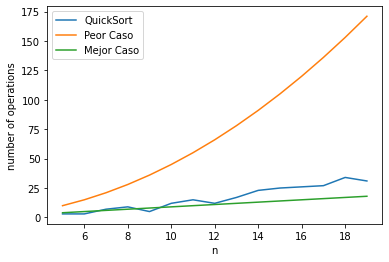

In [291]:
import matplotlib.pyplot as plt

x=[n for n in range(5,20)] 
y1=[n*(n-1)/2 for n in range(5,20)] # worst case
y2=[n-1 for n in range(5,20)] # best case
y=[]; 

for n in range(5,20):
  a = random.sample(range(1, 100), n)
  a,counter = Qsort(0,len(a)-1,a,Particion)
  y.append(counter)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["QuickSort", "Peor Caso", "Mejor Caso"])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

###5.2 **peor casocon el pivote cambiado Cambio de lugar del pivote**

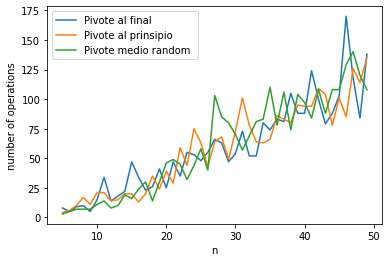

In [301]:
import matplotlib.pyplot as plt

x= [n for n in range(5,50)]
y=[];
y1=[];
y2=[]; 


for n in range(5,50):
  a = random.sample(range(1, 100), n)
  a,counter1 = Qsort(0,len(a)-1,a,Particion)
  y.append(counter1)

for n in range(5,50):
  a = random.sample(range(1, 100), n)
  a,counter2 = Qsort(0,len(a)-1,a,BajaParticion)
  y1.append(counter2)

for n in range(5,50):
  a = random.sample(range(1, 100), n)
  a,counter3 = Qsort(0,len(a)-1,a,RandParticion)
  y2.append(counter3)

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["Pivote al final", "Pivote al prinsipio", "Pivote medio random "])

plt.xlabel('n')
plt.ylabel('number of operations')
plt.show()

##5.3 Comparaciones con otros algoritmos

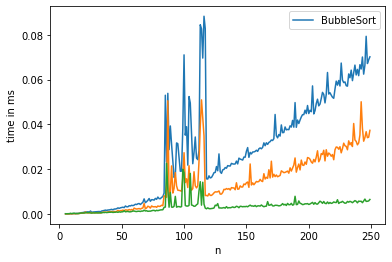

In [303]:
def bubble_sort(a, verbose=False):
    n = len(a)
    T = 0
    for i in range(1,n+1):
        already_sorted = True

        for j in range(n - i):
            T +=1
            if a[j] > a[j + 1]:
                a[j], a[j + 1] = a[j + 1], a[j]
                already_sorted = False

        if already_sorted:
            if verbose == True: print("is sorted!")
            break

    if verbose == True: print("\noutput array:",a)

    return a

def InsertionSort(lista, verbose=False):

  n = len(lista) 
  c = 0
  m = 0
  temp = c 
  for i in range(1,n):

    aux = lista[i] 
    j = i-1 

    temp = c 

    while j >= 0 and lista[j] > aux :
     
      lista[j+1] = lista[j]
      j = j-1 
      c+=1 
    lista[j+1] = aux 

  return lista

import matplotlib.pyplot as plt
import datetime
from timeit import repeat

x=[]
y1=[]
y2=[]
y3=[]

for n in range(5,250):

  a = random.sample(range(1, 1000), n)

  t = repeat(setup="from __main__ import bubble_sort", stmt=f"bubble_sort({a})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import InsertionSort", stmt=f"InsertionSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import Qsort", stmt=f"Qsort({0},{len(a)-1},{a})", repeat=1, number=10)

  x.append(n)
  y1.append(t)
  y2.append(t1)
  y3.append(t2)


plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y3)
plt.legend(["BubbleSort"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()
 